CLASSIFICATION

In [69]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR

In [72]:
data = pd.read_csv('/content/drive/MyDrive/CourseworkAI/Student Depression Dataset.csv')

In [73]:
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [75]:
data.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


In [76]:
data.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27898.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,3.139867,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,1.437347,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,2.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,3.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,4.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,5.000000,1.000000


In [77]:
data["Depression"].unique()  # Check unique categories
data["Depression"].value_counts()  # Count instances per category


,count
Depression,
1,16336
0,11565


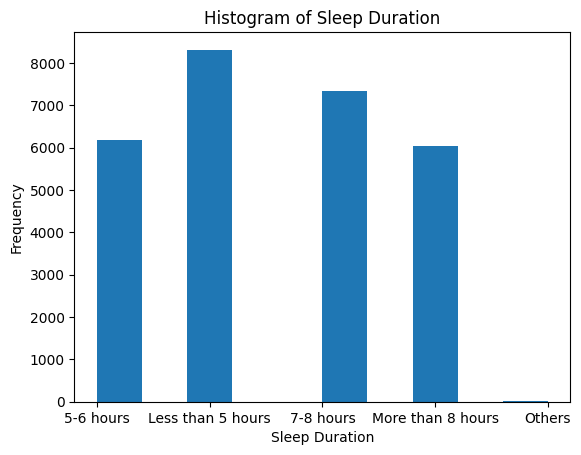

In [78]:
# For a single column:
plt.hist(data['Sleep Duration'])
plt.xlabel('Sleep Duration')
plt.ylabel('Frequency')
plt.title('Histogram of Sleep Duration')
plt.show()

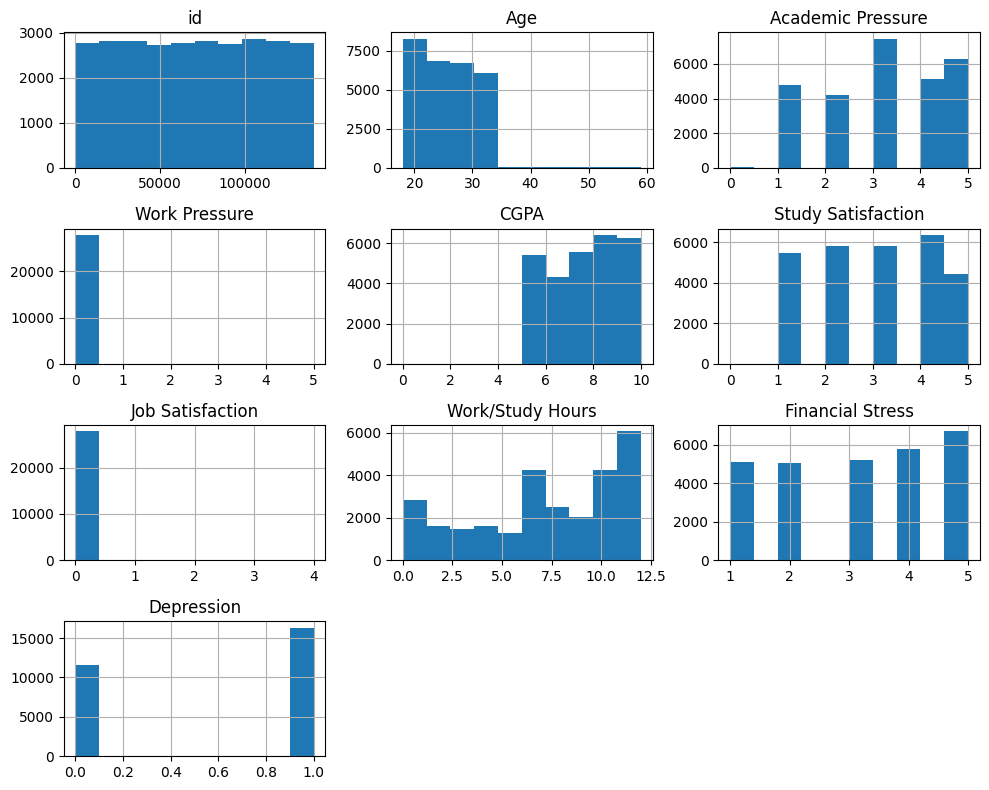

In [79]:
# For multiple columns:
data.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

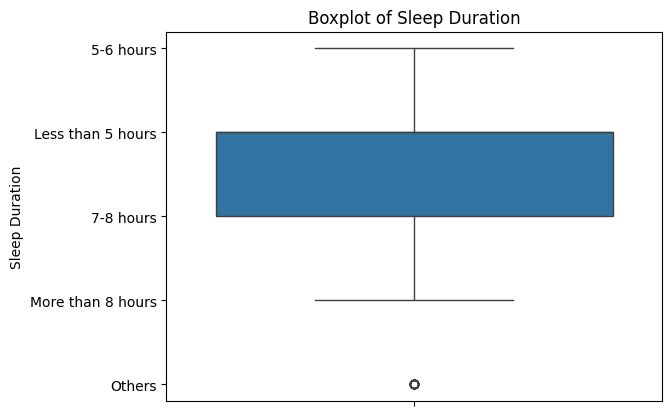

In [80]:
# For a single column:
sns.boxplot(y=data['Sleep Duration'])
plt.title('Boxplot of Sleep Duration')
plt.show()

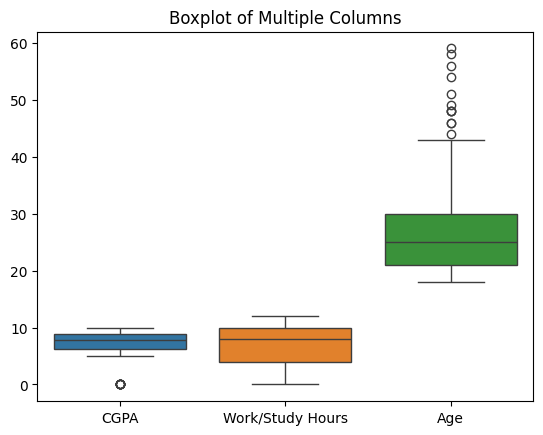

In [81]:
# For multiple columns:
sns.boxplot(data=data[['CGPA', 'Work/Study Hours', 'Age']])
plt.title('Boxplot of Multiple Columns')
plt.show()

In [82]:
# Encode categorical column "gender" (one-hot encoding)
data_encoded = pd.get_dummies(data, columns=["Gender"], drop_first=True)  # Converts 'gender' into numeric

In [83]:
# Select only numerical columns for correlation analysis
num_data = data_encoded.select_dtypes(include=["number"])

In [84]:
correlation_matrix = num_data.corr()

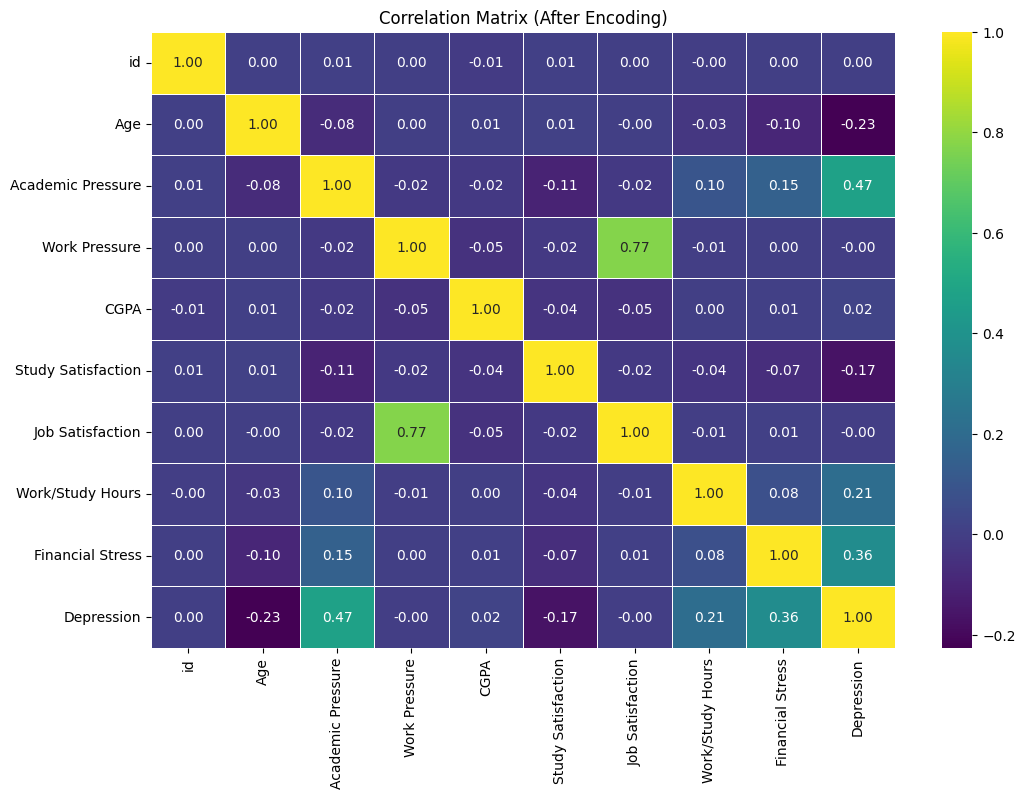

In [85]:
# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (After Encoding)")
plt.show()


Feature selection

In [86]:
features = ['Academic Pressure', 'Financial Stress', 'Work/Study Hours']
target = 'Depression'

In [87]:
X = data[features].values  # Feature matrix
y = data[target].values  # Target variable

Train and Test Classification models

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [89]:
#Handle Missing Values (Mean Imputation)
imputer = SimpleImputer(strategy="mean")
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [90]:
# Train Random Forest Classifier (Baseline)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees
rf_model.fit(X_train_imputed, y_train)  # Train model

RandomForestClassifier(random_state=42)

In [91]:
rf_predictions = rf_model.predict(X_test_imputed)

In [92]:
accuracy = accuracy_score(y_test, rf_predictions)
precision = precision_score(y_test, rf_predictions, average="weighted")  #imbalanced classes
recall = recall_score(y_test, rf_predictions, average="weighted")
f1 = f1_score(y_test, rf_predictions, average="weighted")

In [93]:
print(f"Random Forest Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Random Forest Accuracy: 0.7619
Precision: 0.7602
Recall: 0.7619
F1-score: 0.7597


Train & Evaluate Multiple Models (Logistic Regression, Decision Tree, Random Forest).

In [94]:
# Handle Missing Values again using Mean Imputation
imputer = SimpleImputer(strategy="mean")  # Replace NaNs with column mean
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [95]:
print("Missing values in X_train_imputed:", np.isnan(X_train_imputed).sum())
print("Missing values in X_test_imputed:", np.isnan(X_test_imputed).sum())


Missing values in X_train_imputed: 0
Missing values in X_test_imputed: 0


In [96]:
# Standardize features for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [97]:
# Train Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
log_predictions = log_reg.predict(X_test_scaled)

In [98]:
# Train Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

In [99]:
# Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [100]:
# Define Function to Evaluate Models
def evaluate_model(name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average="weighted")
    recall = recall_score(y_true, y_pred, average="weighted")
    f1 = f1_score(y_true, y_pred, average="weighted")

    print(f"\n{name} Model Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")

    return accuracy, precision, recall, f1

In [101]:
# Compare Model Performances
log_results = evaluate_model("Logistic Regression", y_test, log_predictions)
dt_results = evaluate_model("Decision Tree", y_test, dt_predictions)
rf_results = evaluate_model("Random Forest", y_test, rf_predictions)


Logistic Regression Model Performance:
Accuracy: 0.7699
Precision: 0.7684
Recall: 0.7699
F1-score: 0.7681

Decision Tree Model Performance:
Accuracy: 0.7629
Precision: 0.7613
Recall: 0.7629
F1-score: 0.7609

Random Forest Model Performance:
Accuracy: 0.7619
Precision: 0.7602
Recall: 0.7619
F1-score: 0.7597


Comparatively, Logical Regression is the best perfoming model among three.

In [102]:
# Identify the Best Model
best_model = max([("Logistic Regression", log_results[0]),
                  ("Decision Tree", dt_results[0]),
                  ("Random Forest", rf_results[0])], key=lambda x: x[1])[0]

print(f"\nBest Performing Model: {best_model}")


Best Performing Model: Logistic Regression


Testing alternative model Hyperparameter Tuning for Random Forest.

In [103]:
# Define hyperparameter grid
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
}

In [104]:
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring="accuracy")
grid_search.fit(X_train, y_train) #perform grid search

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [105]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}


In [106]:
# Train optimized Random Forest with best parameters
best_rf_model = grid_search.best_estimator_
best_rf_predictions = best_rf_model.predict(X_test)

In [107]:
# Evaluate Tuned Random Forest
best_rf_accuracy = accuracy_score(y_test, best_rf_predictions)
best_rf_precision = precision_score(y_test, best_rf_predictions, average="weighted")
best_rf_recall = recall_score(y_test, best_rf_predictions, average="weighted")
best_rf_f1 = f1_score(y_test, best_rf_predictions, average="weighted")

In [108]:
print(f"Tuned Random Forest Accuracy: {best_rf_accuracy:.4f}")
print(f"Tuned Random Forest Precision: {best_rf_precision:.4f}")
print(f"Tuned Random Forest Recall: {best_rf_recall:.4f}")
print(f"Tuned Random Forest F1-score: {best_rf_f1:.4f}")

Tuned Random Forest Accuracy: 0.7619
Tuned Random Forest Precision: 0.7602
Tuned Random Forest Recall: 0.7619
Tuned Random Forest F1-score: 0.7597


Tuning Random Forest showed no improvements in the model performance.

Feature imprtance Analysis

In [109]:
# Get feature importance scores from the best model
feature_importance = best_rf_model.feature_importances_

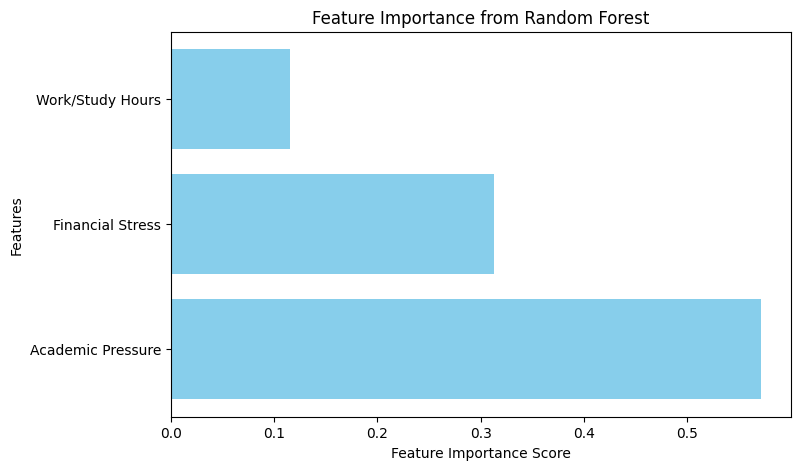

In [110]:
plt.figure(figsize=(8, 5))
plt.barh(features, feature_importance, color="skyblue")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance from Random Forest")
plt.show()

In [111]:
important_features = np.argsort(feature_importance)[-3:]
X_train_selected = X_train[:, important_features]
X_test_selected = X_test[:, important_features]

In [112]:
selected_features = np.array(features)[important_features]
print("Selected Features:", selected_features)

Selected Features: ['Work/Study Hours' 'Financial Stress' 'Academic Pressure']


In [113]:
X_train_selected = X_train[:, [features.index(f) for f in selected_features]]
X_test_selected = X_test[:, [features.index(f) for f in selected_features]]

In [114]:
# Train Final Optimized Random Forest Model
final_rf_model = RandomForestClassifier(**grid_search.best_params_, random_state=42)
final_rf_model.fit(X_train_selected, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=10, random_state=42)

In [115]:
final_rf_predictions = final_rf_model.predict(X_test_selected)

In [116]:
# Evaluate Final Optimized Model
final_accuracy = accuracy_score(y_test, final_rf_predictions)
final_precision = precision_score(y_test, final_rf_predictions, average="weighted")
final_recall = recall_score(y_test, final_rf_predictions, average="weighted")
final_f1 = f1_score(y_test, final_rf_predictions, average="weighted")

In [117]:
print("\nFinal Optimized Random Forest Model Performance:")
print(f"Accuracy: {final_accuracy:.4f}")
print(f"Precision: {final_precision:.4f}")
print(f"Recall: {final_recall:.4f}")
print(f"F1-score: {final_f1:.4f}")


Final Optimized Random Forest Model Performance:
Accuracy: 0.7619
Precision: 0.7602
Recall: 0.7619
F1-score: 0.7597


In [118]:
# Compare Initial vs Final Model Performance
print("\nComparison of Initial vs Final Model:")
print(f"Initial Random Forest Accuracy: {rf_results[0]:.4f}")
print(f"Tuned & Optimized Random Forest Accuracy: {final_accuracy:.4f}")


Comparison of Initial vs Final Model:
Initial Random Forest Accuracy: 0.7619
Tuned & Optimized Random Forest Accuracy: 0.7619


Logistic Regression model performed best. Random Forest and Decision did not performed well comparatively and also tuning Random Forest didn't help cause there was no any improvements in the performance.

Addressing class imbalance through techniques like SMOTE could further enhance results. In future more advance models should be explored for  better model performance.

REGRESSION

In [119]:
df = pd.read_csv('/content/drive/MyDrive/CourseworkAI/Student Depression Dataset.csv')

In [120]:
# Handle Missing Values
imputer = SimpleImputer(strategy="mean")  # Fill missing values with mean
df["Financial Stress"] = imputer.fit_transform(df[["Financial Stress"]])

In [121]:
# Encode Categorical Variables
categorical_features = ["Gender", "City", "Profession", "Sleep Duration",
                         "Dietary Habits", "Degree", "Have you ever had suicidal thoughts ?",
                         "Family History of Mental Illness"]


In [122]:
# Label Encoding for Binary Categorical Variables
label_encoders = {}
for col in ["Gender", "Have you ever had suicidal thoughts ?", "Family History of Mental Illness"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for later use

In [123]:
# One-Hot Encoding for Multi-Class Categorical Variables
df = pd.get_dummies(df, columns=["City", "Profession", "Sleep Duration", "Dietary Habits", "Degree"], drop_first=True)

In [124]:
# Drop Unnecessary Columns
df.drop(columns=["id"], inplace=True, errors="ignore")  # Remove ID column

In [125]:
# Check Preprocessed Data
print("\nUpdated Dataset Info:")
print(df.info())
print("\n First 5 Rows:")
print(df.head())



Updated Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Columns: 110 entries, Gender to Degree_PhD
dtypes: bool(98), float64(8), int64(4)
memory usage: 5.2 MB
None

 First 5 Rows:
   Gender   Age  Academic Pressure  Work Pressure  CGPA  Study Satisfaction  \
0       1  33.0                5.0            0.0  8.97                 2.0   
1       0  24.0                2.0            0.0  5.90                 5.0   
2       1  31.0                3.0            0.0  7.03                 5.0   
3       0  28.0                3.0            0.0  5.59                 2.0   
4       0  25.0                4.0            0.0  8.13                 3.0   

   Job Satisfaction  Have you ever had suicidal thoughts ?  Work/Study Hours  \
0               0.0                                      1               3.0   
1               0.0                                      0               3.0   
2               0.0                                      0    

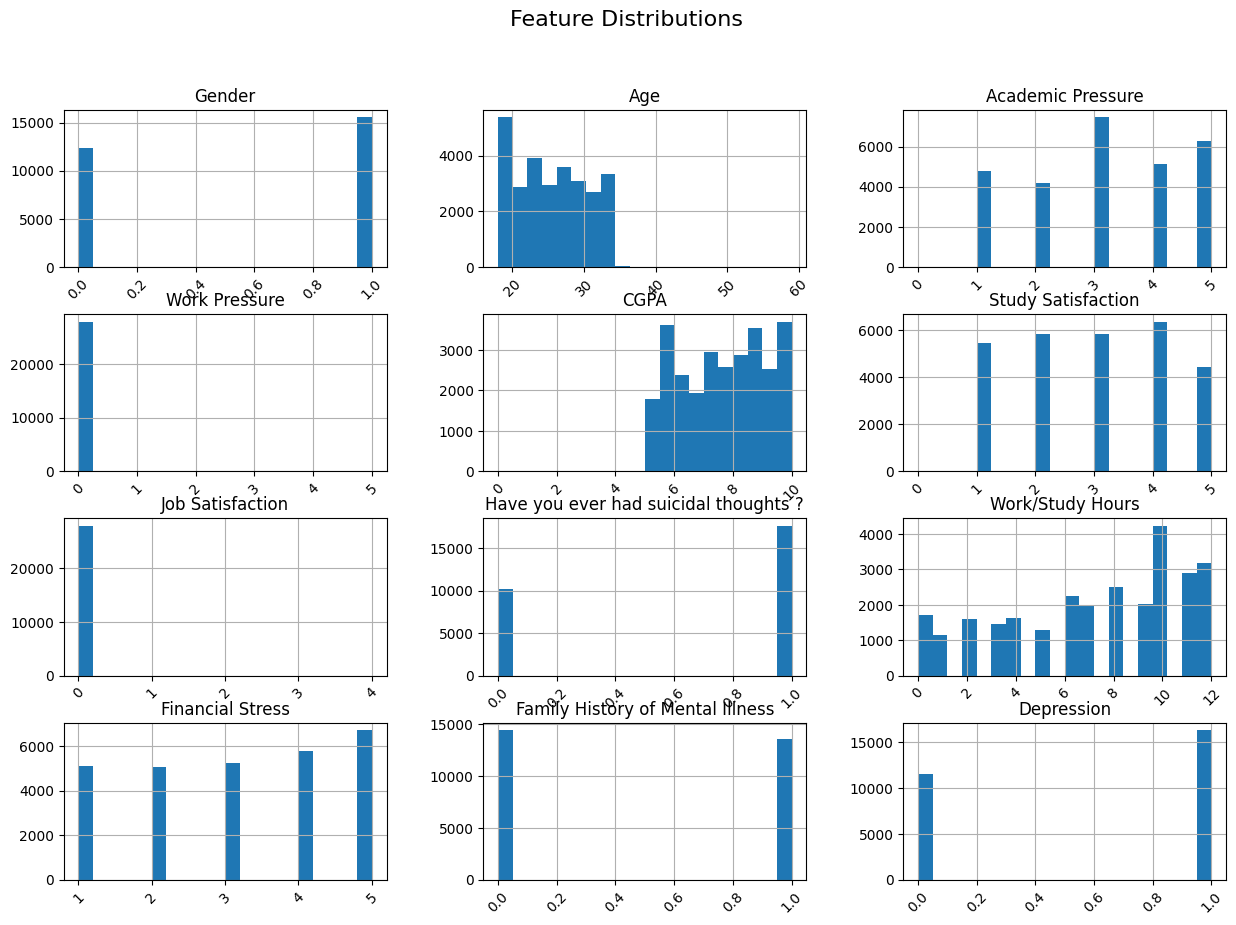

In [126]:
#Histograms
df.hist(figsize=(15, 10), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)

for ax in plt.gcf().axes:
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
    plt.setp(ax.yaxis.get_majorticklabels(), rotation=0)

plt.show()

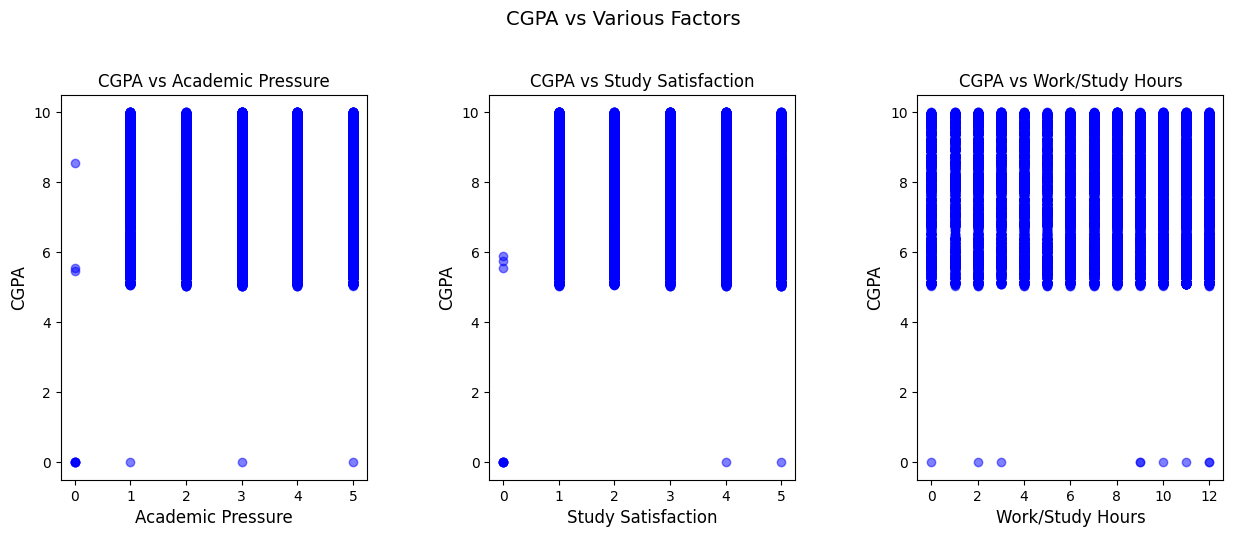

In [127]:
# Scatter Plots: CGPA vs. Key Features
plt.figure(figsize=(15, 5))
features_to_plot = ['Academic Pressure', 'Study Satisfaction', 'Work/Study Hours']
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(1, 3, i)
    plt.scatter(df[feature], df["CGPA"], alpha=0.5, color='blue')
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("CGPA", fontsize=12)
    plt.title(f"CGPA vs {feature}", fontsize=12)

    plt.subplots_adjust(wspace=0.4)  # Add spacing between plots
plt.suptitle("CGPA vs Various Factors", fontsize=14, y=1.05)
plt.show()

In [128]:
# Select only numeric features
numeric_features = df.select_dtypes(include=['number'])

In [129]:
# Compute correlation matrix
corr_matrix = numeric_features.corr()

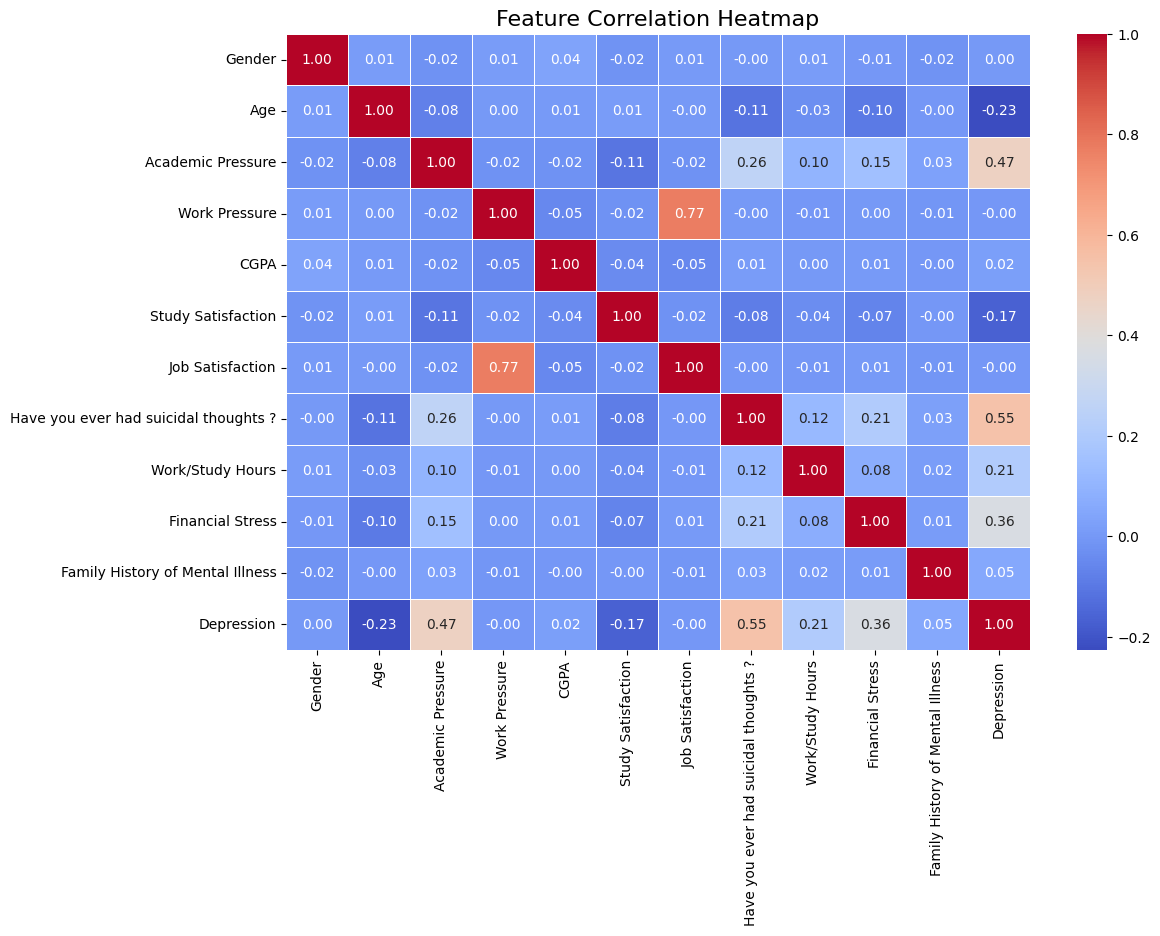

In [130]:
# Plot heatmap with better size
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.show()

Feature Selection

In [131]:
# Select relevant features manually based on correlation & domain knowledge
selected_features = [
    "Academic Pressure", "Study Satisfaction", "Work/Study Hours", "Financial Stress"
]

In [132]:
# Define X (features) and y (target)
X = df[selected_features]
y = df["CGPA"]

In [133]:
# Display selected features
print("\n Final Selected Features for Regression:\n", selected_features)


 Final Selected Features for Regression:
 ['Academic Pressure', 'Study Satisfaction', 'Work/Study Hours', 'Financial Stress']


Train and evaluate Regression Models

In [134]:
# Split data into training & testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [135]:
# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

In [136]:
# Train Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [137]:
# Train XGBoost Model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

In [138]:
# Evaluate Performance
def evaluate_model(model_name, y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"\n {model_name} Performance:")
    print(f"   - RMSE: {rmse:.4f}")
    print(f"   - R² Score: {r2:.4f}")

In [139]:
# Print Results
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb)


 Linear Regression Performance:
   - RMSE: 1.4605
   - R² Score: 0.0029

 Random Forest Performance:
   - RMSE: 1.5133
   - R² Score: -0.0705

 XGBoost Performance:
   - RMSE: 1.4651
   - R² Score: -0.0033


All models perform poorly which means weak connection between target variable "CGPA" and features selected. Among three Linear Regression performed best and Random Forest performed worst comparatively.

Train and evaulate alternative model (Support Vector Regression(SVR))

In [ ]:
# Train Support Vector Regressor (SVR)
svr_model = SVR(kernel='rbf') #Radial Basis Function
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

In [141]:
# Evaluate Performance
def evaluate_model(model_name, y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"\n {model_name} Performance:")
    print(f"   - RMSE: {rmse:.4f}")
    print(f"   - R² Score: {r2:.4f}")

In [142]:
evaluate_model("Support Vector Regression", y_test, y_pred_svr)


 Support Vector Regression Performance:
   - RMSE: 1.4644
   - R² Score: -0.0025


Linear Regression has lowest RMSE and highest R2 score even though it's still low, this is the best performing model in comparison. Alternative models also didn't improve results.

CGPA is weakly correlated with features which lead to low R2 scores.Future work should explore additional relevant features and try to train and evaluate more models.